In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import math
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

In [1]:
def read_all_lines(file) :
    with open(file, 'rt') as fd:
        convert = [e.split() for e in fd.readlines()]
        all_data = []
        all_results = []
        for line in convert:
            data = line
            result = data.pop(-1)
            all_data.append(data)
            all_results.append(result)
            
        float_data = []
        for element in all_data:
            float_data.append([float(e) for e in element])
        float_data = np.array(float_data)
        all_results = np.array(all_results)
        
        normalized_data = []
        for element in float_data:
            mean = math.fsum(element)/len(element)
            std = math.sqrt(sum((element-mean)**2)/(len(element)-1))
            normalized_data.append((element - mean)/std)
        normalized_data = np.array(normalized_data)
        return normalized_data, all_results
    
def box_plot(data,title):
    fig = figure()
    plt.figure(figsize=(10,data.shape[1]/3))
    red_square = dict(markerfacecolor='red', marker='D')
    inverted_data = list()
    for i in range (0,data.shape[1]):
        inverted_data.append(data[:,i])
    plt.title(title,fontsize=30)
    plt.boxplot(inverted_data,flierprops=red_square)
    return fig

# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['medians'][1], color='red')

def box_plot_compare(original_data,filtered_data,title):
    fig = figure()
    figure(figsize=(30,15))
    ax = axes()
    hold(True)
    plt.title(title,fontsize=30)
    
    p1 = 1
    p2 = 2
    for i in range(41):
        g = [original_data[:,i],filtered_data[:,i]]
        bp = boxplot(g, positions = [p1,p2], widths = 0.6)
        setBoxColors(bp)
        p1+=3
        p2+=3

    # set axes limits and labels
    xlim(0,123)
    ylim(-4,4)
    ax.set_xticklabels(range(41))
    ax.set_xticks(list(range(2,123,3)))

    # draw temporary red and blue lines and use them to create a legend
    legend1, = plot([1,1],'b-')
    legend2, = plot([1,1],'r-')
    legend((legend1, legend2),('MRCP','Noise'),prop = {'size':15})
    legend1.set_visible(False)
    legend2.set_visible(False)
    
    savefig('picture/'+str(title)+'.png')
    return fig

In [10]:
for i in range(1,10):
    data , results = read_all_lines('training data/participant_'+str(i)+'.txt')
    test_data , test_results = read_all_lines('test data/participant_'+str(i)+'.txt')

    mrcp_data = list()
    noise_data = list()
    mrcp_result = list()
    noise_result = list()

    for each_data, each_result in zip(data,results):
        if each_result == 'MRCP':
            mrcp_data.append(each_data)
            mrcp_result.append(each_result)
        else:
            noise_data.append(each_data)
            noise_result.append(each_result)

    mrcp_data = np.array(mrcp_data)
    noise_data = np.array(noise_data)
    mrcp_results = np.array(mrcp_result)
    noise_results = np.array(noise_result)

#     box_plot(data,'All Data: '+str(i))
#     box_plot(mrcp_data,'MRCP Data: '+str(i))
#     box_plot(noise_data,'Noise Data: '+str(i))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

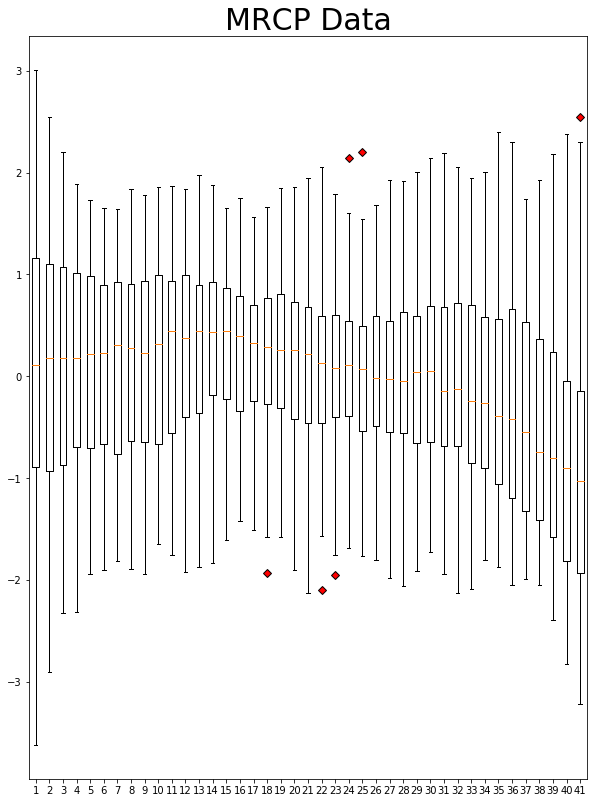

<Figure size 432x288 with 0 Axes>

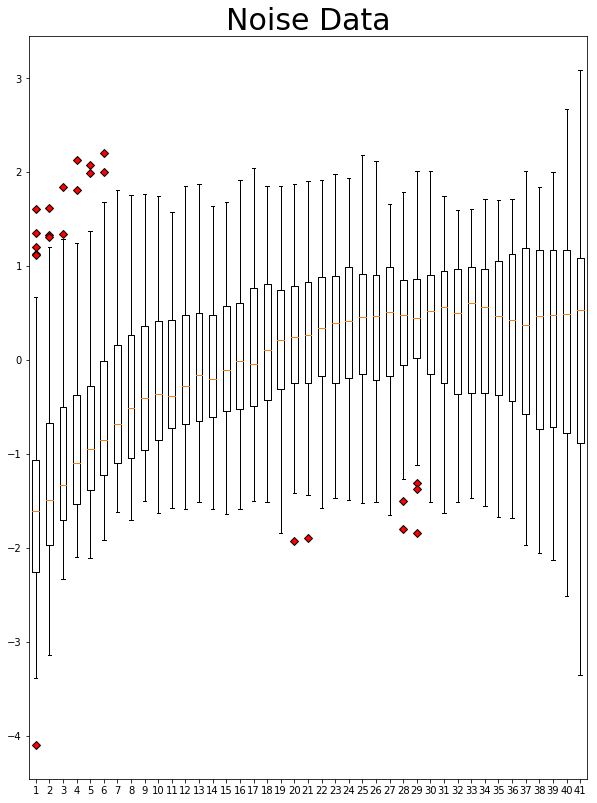

In [11]:
# box_plot(data,'All Data')
box_plot(mrcp_data,'MRCP Data')
box_plot(noise_data,'Noise Data')